# Ejemplo práctico: presupuesto de comunas

En este ejemplo vamos a analizar el presupuesto de las comunas por región. Para esto, vamos a trabajar con los `.csv` de Comunas y Presupuesto por Comunas. Primero vamos a importar nuestros DataFrames y vamos a hacer el _merge_ respectivo.

In [1]:
import pandas as pd

df_comunas = pd.read_csv("codigos.csv", delimiter=";")
df_presupuesto = pd.read_csv("presupuesto_2019.csv", delimiter=";")

In [2]:
# Limpiamos el DataFrame de presupuesto
df_presupuesto = df_presupuesto.replace("No Recepcionado", 0)
df_presupuesto["PRESUPUESTO"] = df_presupuesto["PRESUPUESTO"].astype(int)

In [3]:
# Hacemos el merge

df_merge = df_comunas.merge(df_presupuesto, left_on="Código Comuna 2018", right_on="CODIGO")

# Y dejamos las columnas que necesitmaos
df_merge = df_merge[["Nombre Comuna", "Nombre Región", "PRESUPUESTO"]]
df_merge

Nombre Comuna Nombre Región  PRESUPUESTO
0          Iquique      Tarapacá     59072234
1    Alto Hospicio      Tarapacá     13984411
2     Pozo Almonte      Tarapacá      7613962
3           Camiña      Tarapacá      1584008
4         Colchane      Tarapacá      2500000
..             ...           ...          ...
340     San Carlos         Ñuble     10459691
341       Coihueco         Ñuble      5001190
342         Ñiquén         Ñuble      3386698
343     San Fabián         Ñuble      1798500
344    San Nicolás         Ñuble      3979700

[345 rows x 3 columns]

Ahora, ¿qué pasa cuando hacemos `describe`?

In [4]:
df_merge.describe()

PRESUPUESTO
count  3.450000e+02
mean   1.413407e+07
std    2.740327e+07
min    0.000000e+00
25%    3.188141e+06
50%    5.372994e+06
75%    1.225000e+07
max    3.399804e+08

¿Qué podemos deducir de los datos anteriores? Ahora veamos estos datos solo para la región metropolitana.

In [5]:
df_metropolitana = df_merge[df_merge["Nombre Región"] == "Metropolitana de Santiago"]
# El apply nos cambia la notación del .describe()
df_metropolitana.describe().apply(lambda s: s.apply('{0:.2f}'.format))

PRESUPUESTO
count         52.00
mean    43416556.31
std     54609666.38
min      3145694.00
25%     14334394.75
50%     30083565.50
75%     47437241.25
max    339980450.00

Veamos cuál es la comuna de la Región Metropolitana con más presupuesto.

In [6]:
df_metropolitana.sort_values("PRESUPUESTO", ascending=False).head(5)

Nombre Comuna              Nombre Región  PRESUPUESTO
269    Las Condes  Metropolitana de Santiago    339980450
256      Santiago  Metropolitana de Santiago    163383547
278   Providencia  Metropolitana de Santiago    125041538
274         Maipú  Metropolitana de Santiago    119318265
287      Vitacura  Metropolitana de Santiago     97000000

Como vemos, es la comuna de Las Condes. Veamos que pasa cuando sacamos esta comuna del DataFrame.

In [7]:
df_metropolitana_sin_lc = df_metropolitana[df_metropolitana["Nombre Comuna"] != "Las Condes"]

In [8]:
df_metropolitana_sin_lc.sort_values("PRESUPUESTO", ascending=False).head(5)

Nombre Comuna              Nombre Región  PRESUPUESTO
256      Santiago  Metropolitana de Santiago    163383547
278   Providencia  Metropolitana de Santiago    125041538
274         Maipú  Metropolitana de Santiago    119318265
287      Vitacura  Metropolitana de Santiago     97000000
265    La Florida  Metropolitana de Santiago     95609849

In [9]:
df_metropolitana_sin_lc.describe().apply(lambda s: s.apply('{0:.2f}'.format))

PRESUPUESTO
count         51.00
mean    37601578.00
std     35332235.46
min      3145694.00
25%     14032736.50
50%     29790072.00
75%     41816220.00
max    163383547.00

Como vemos, el promedio cambió bastante. Vamos a calcular el cambio en cada una de las medidas.

In [10]:
diff_dataframes = df_metropolitana.describe() - df_metropolitana_sin_lc.describe()
diff_dataframes.apply(lambda s: s.apply('{0:.2f}'.format))

PRESUPUESTO
count          1.00
mean     5814978.31
std     19277430.92
min            0.00
25%       301658.25
50%       293493.50
75%      5621021.25
max    176596903.00

Para comprender de mejor forma los datos, podemos dividir en distintos _bins_ el presupuesto, para así hacer un histograma.

<ipython-input-11-b03b9f07ff5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 5)


<AxesSubplot:>

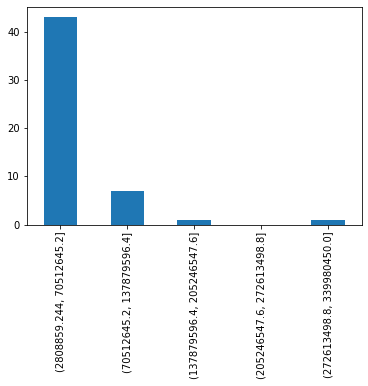

In [11]:
df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 5)
df_metropolitana["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Como vemos, la mayor parte de las comunas tiene un presupuesto que cae en el primer bin. Probemos con más bins.

<ipython-input-12-6e6c8c5a9a4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 10)


<AxesSubplot:>

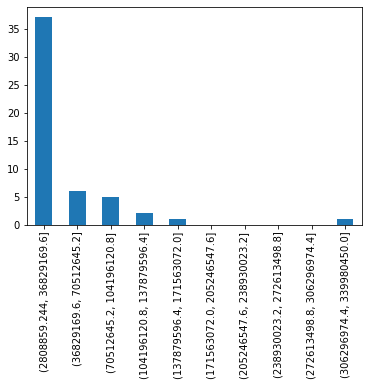

In [12]:
df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 10)
df_metropolitana["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

<ipython-input-13-8ef27283421e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 20)


<AxesSubplot:>

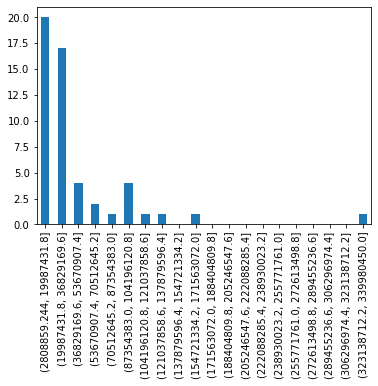

In [13]:
df_metropolitana["intervalos_presupuesto"] = pd.cut(df_metropolitana["PRESUPUESTO"], 20)
df_metropolitana["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Como vemos, la mayor parte de las comunas tiene un presupuesto bajo. Ahora, ¿qué pasa si calculamos el _skew_ de la columna presupuesto?

In [14]:
df_metropolitana.skew()

PRESUPUESTO    3.579377
dtype: float64

También podemos probar cómo queda el histograma para las comunas de la Región Metropolitana sin la comuna de Las Condes.

<ipython-input-16-2b39379780a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 10)


<AxesSubplot:>

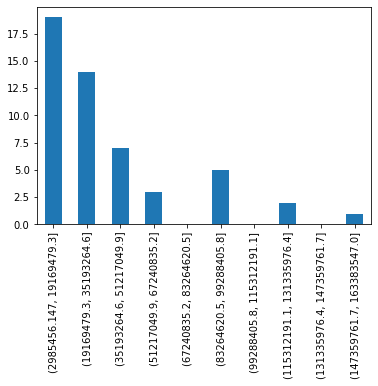

In [16]:
df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 10)
df_metropolitana_sin_lc["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

<ipython-input-17-465fe90b4c44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 20)


<AxesSubplot:>

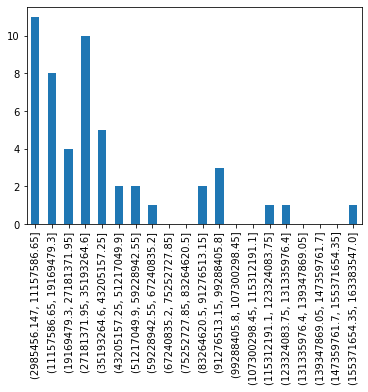

In [17]:
df_metropolitana_sin_lc["intervalos_presupuesto"] = pd.cut(df_metropolitana_sin_lc["PRESUPUESTO"], 20)
df_metropolitana_sin_lc["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Finalmente podemos probar esto para otra región. Veamos que pasa con la región de Aysen.

In [19]:
df_aysen = df_merge[df_merge["Nombre Región"] == "Aysén del General Carlos Ibáñez del Campo"]

<ipython-input-21-2ad83be4de94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aysen["intervalos_presupuesto"] = pd.cut(df_aysen["PRESUPUESTO"], 5)


<AxesSubplot:>

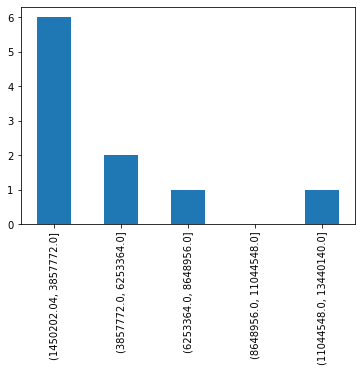

In [21]:
df_aysen["intervalos_presupuesto"] = pd.cut(df_aysen["PRESUPUESTO"], 5)
df_aysen["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')